In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Path to the training and validation directories
train_path = '/content/gdrive/MyDrive/pothole dataset/test'
valid_path = '/content/gdrive/MyDrive/pothole dataset/train'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

# Define image size and batch size
IMAGE_SIZE = [150, 150]
BATCH_SIZE = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
# Load and preprocess the training and validation data
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')



Found 262 images belonging to 2 classes.
Found 1363 images belonging to 2 classes.


In [ ]:
# Load the InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with 2 output units (for 2 classes)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_set, epochs=10, validation_data=valid_set)



87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 0.4242 - accuracy: 0.8282

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 [==============================] - 200s 20s/step - loss: 0.4242 - accuracy: 0.8282 - val_loss: 7.5675 - val_accuracy: 0.5525
Epoch 2/10
9/9 [==============================] - 210s 25s/step - loss: 0.1972 - accuracy: 0.9275 - val_loss: 345.4027 - val_accuracy: 0.5158
Epoch 3/10
9/9 [==============================] - 159s 19s/step - loss: 0.2023 - accuracy: 0.9580 - val_loss: 435.5917 - val_accuracy: 0.5158
Epoch 4/10
9/9 [==============================] - 163s 20s/step - loss: 0.2463 - accuracy: 0.8931 - val_loss: 251.5059 - val_accuracy: 0.5253
Epoch 5/10
9/9 [==============================] - 161s 19s/step - loss: 0.2207 - accuracy: 0.9160 - val_loss: 709.2130 - val_accuracy: 0.4842
Epoch 6/10
9/9 [==============================] - 211s 25s/step - loss: 0.0981 - accuracy: 0.9695 - val_loss: 257.9911 - val_accuracy: 0.4842
Epoch 7/10
9/9 [==============================] - 165s 19s/step - loss: 0.0698 - accuracy: 0.9771 - val_loss: 50.5016 - val_accuracy: 0.4585
Epoch 8/10
9/9 [====

In [ ]:
# Generate predictions for the validation data
y_pred = model.predict(valid_set)
y_pred = np.argmax(y_pred, axis=1)

# Obtain the true labels for the validation data
y_true = valid_set.classes



43/43 [==============================] - 96s 2s/step


In [ ]:
# Compute confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)



Confusion Matrix:
[[357 346]
 [338 322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       703
           1       0.48      0.49      0.48       660

    accuracy                           0.50      1363
   macro avg       0.50      0.50      0.50      1363
weighted avg       0.50      0.50      0.50      1363



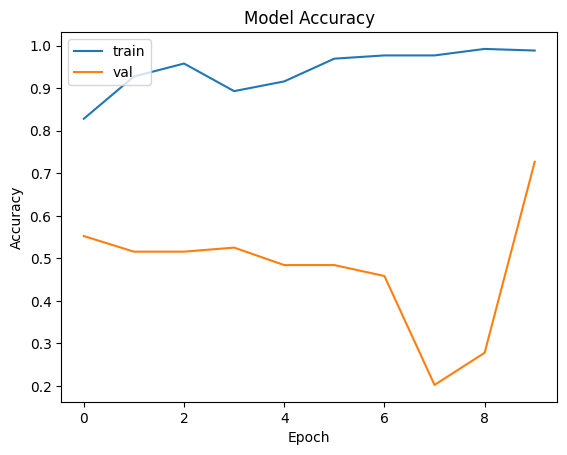

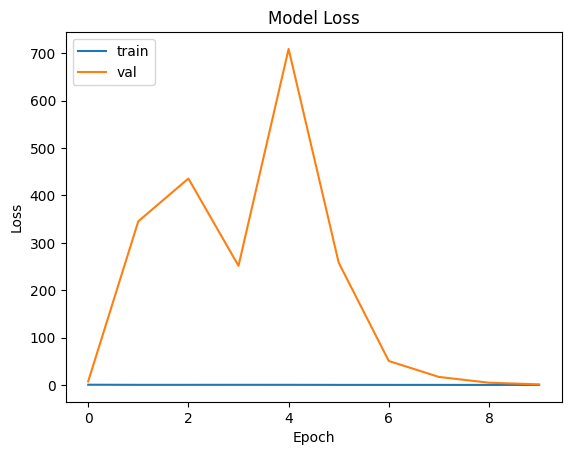

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
# Save the model as an h5 file
model.save('/content/gdrive/MyDrive/path holemodel/trained_model.h5')
